# Применение алгоритмов машинного обучения для задачи банковского скоринга

* Описание данных
    * SeriousDlqin2yrs - Флаг выхода на просрочку через 90 дней
    * RevolvingUtilizationOfUnsecuredLines - Общий баланс по кредитным картам и личным кредитным линиям, за исключением недвижимости, и без задолженности по кредитам, таким как автокредиты, деленные на сумму кредитных лимитов
    * age - Возраст заёмщика в годах
    * NumberOfTime30-59DaysPastDueNotWorse - Сколько раз заемщик просрочил выплату не более, чем на 30-59 дней, за последние 2 года.
    * DebtRatio - Ежемесячные платежи по долгам, алименты и прожиточные расходы, делённые на месячный валовый доход
    * MonthlyIncome - Ежемесячный доход
    * NumberOfOpenCreditLinesAndLoans - Количество открытых кредитов (например, автокредит или закладная, кредитные карты и т.д.)
    * NumberOfTimes90DaysLate - Сколько раз заёмщик просрочил выплату на 90 дней и более.
    * NumberRealEstateLoansOrLines - Количество ипотечных кредитов и кредитов на недвижимость
    * NumberOfTime60-89DaysPastDueNotWorse - Сколько раз заёмщик просрочил выплату не более, чем на 60-89 дней, за последние 2 года.
    * NumberOfDependents - Количество иждивенцев в семье, исключая самого заёмщика (супруга, дети и т.д.)    
    
Целевой переменной является SeriousDlqin2yrs


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('cs-training.csv')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [2]:
# размер набора данных
df.shape

(150000, 11)

In [3]:
# Выводим названия колонок
df.iloc[0]

SeriousDlqin2yrs                           1.000000
RevolvingUtilizationOfUnsecuredLines       0.766127
age                                       45.000000
NumberOfTime30-59DaysPastDueNotWorse       2.000000
DebtRatio                                  0.802982
MonthlyIncome                           9120.000000
NumberOfOpenCreditLinesAndLoans           13.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               6.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         2.000000
Name: 1, dtype: float64

In [4]:
# Смотрим информацию по каждой колонке
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [5]:
# Выводим характеристики каждого признака
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
#5) Выводим соотношение между 1 и 0 для SeriousDlqin2yrs
df["SeriousDlqin2yrs"].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [7]:
#6) Определим средний возраст
df["age"].mean()

52.295206666666665

In [8]:
#7) Создадим свобную табличку для SeriousDlqin2yrs по признакам:
pd.pivot_table(df,["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"],
    columns= 'SeriousDlqin2yrs',
    aggfunc='mean',
)

SeriousDlqin2yrs,0,1
NumberOfTime30-59DaysPastDueNotWorse,0.280109,2.388490
NumberOfTime60-89DaysPastDueNotWorse,0.126666,1.828047
NumberOfTimes90DaysLate,0.135225,2.091362


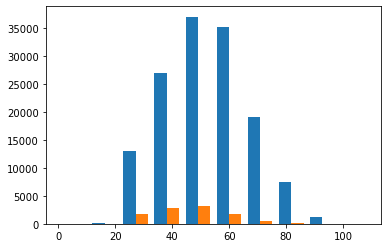

In [9]:
#8) Визуализируем распределение переменной age для SeriousDlqin2yrs
column_data1 = df[df['SeriousDlqin2yrs']. map(lambda x: x==0)]
column_data2 = df[df['SeriousDlqin2yrs']. map(lambda x: x==1)]
plt.figure()
plt.hist([column_data1['age'], column_data2['age']])
plt.show()

In [10]:
#!pip install plotly

In [11]:
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

In [12]:
#9) Посмотрим на частоты признака NumberOfDependents
df["NumberOfDependents"].value_counts(normalize=True)

0.0     0.594909
1.0     0.180153
2.0     0.133643
3.0     0.064918
4.0     0.019593
5.0     0.005107
6.0     0.001082
7.0     0.000349
8.0     0.000164
9.0     0.000034
10.0    0.000034
13.0    0.000007
20.0    0.000007
Name: NumberOfDependents, dtype: float64

In [13]:
#10) Узнаем максимальное значение по каждому признаку
df.apply(np.max, axis=0)

SeriousDlqin2yrs                              1.0
RevolvingUtilizationOfUnsecuredLines      50708.0
age                                         109.0
NumberOfTime30-59DaysPastDueNotWorse         98.0
DebtRatio                                329664.0
MonthlyIncome                           3008750.0
NumberOfOpenCreditLinesAndLoans              58.0
NumberOfTimes90DaysLate                      98.0
NumberRealEstateLoansOrLines                 54.0
NumberOfTime60-89DaysPastDueNotWorse         98.0
NumberOfDependents                           20.0
dtype: float64

In [14]:
#11) Выведем ту часть таблицы, для которой значение признака age > 65
df[df["age"].map(lambda x: x > 65)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
15,0,0.019657,76,0,477.000000,0.0,6,0,1,0,0.0
17,0,0.061086,78,0,2058.000000,NaN,10,0,2,0,0.0
28,0,0.034421,69,0,0.042383,2500.0,17,0,0,0,1.0
38,0,1.000000,75,1,0.134078,3400.0,1,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
149972,0,0.058001,83,0,0.013997,5000.0,6,0,0,0,0.0
149977,0,0.000627,76,0,60.000000,NaN,5,0,0,0,0.0
149984,0,0.002485,82,0,0.000800,5000.0,5,0,0,0,0.0
149985,0,0.037548,84,0,25.000000,NaN,5,0,0,0,0.0


In [15]:
#12) Сгруппируем таблицу по SeriousDlqin2yrs и посмотрим статистику для признаков 'RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio'
s = df.groupby(by = df.SeriousDlqin2yrs)
print(s['RevolvingUtilizationOfUnsecuredLines'].describe(percentiles = []))
print(s['age'].describe(percentiles = []))
print(s['DebtRatio'].describe(percentiles = []))

                     count      mean         std  min       50%      max
SeriousDlqin2yrs                                                        
0                 139974.0  6.168855  256.126350  0.0  0.133288  50708.0
1                  10026.0  4.367282  131.835778  0.0  0.838853   8328.0
                     count       mean        std   min   50%    max
SeriousDlqin2yrs                                                   
0                 139974.0  52.751375  14.791079   0.0  52.0  109.0
1                  10026.0  45.926591  12.916289  21.0  45.0  101.0
                     count        mean          std  min       50%       max
SeriousDlqin2yrs                                                            
0                 139974.0  357.151168  2083.282060  0.0  0.362659  329664.0
1                  10026.0  295.121066  1238.360283  0.0  0.428227   38793.0


In [16]:
#13) Тоже самое, только для mean, std, min, max
s = df.groupby(by = df.SeriousDlqin2yrs)
a = s['RevolvingUtilizationOfUnsecuredLines'].describe(percentiles = [])
print(a['mean'])
print(a['std'])
print(a['min'])
print(a['max'])
print("======================")
b = s['age'].describe(percentiles = [])
print(b['mean'])
print(b['std'])
print(b['min'])
print(b['max'])
print("======================")
c = s['DebtRatio'].describe(percentiles = [])
print(c['mean'])
print(c['std'])
print(c['min'])
print(c['max'])

SeriousDlqin2yrs
0    6.168855
1    4.367282
Name: mean, dtype: float64
SeriousDlqin2yrs
0    256.126350
1    131.835778
Name: std, dtype: float64
SeriousDlqin2yrs
0    0.0
1    0.0
Name: min, dtype: float64
SeriousDlqin2yrs
0    50708.0
1     8328.0
Name: max, dtype: float64
SeriousDlqin2yrs
0    52.751375
1    45.926591
Name: mean, dtype: float64
SeriousDlqin2yrs
0    14.791079
1    12.916289
Name: std, dtype: float64
SeriousDlqin2yrs
0     0.0
1    21.0
Name: min, dtype: float64
SeriousDlqin2yrs
0    109.0
1    101.0
Name: max, dtype: float64
SeriousDlqin2yrs
0    357.151168
1    295.121066
Name: mean, dtype: float64
SeriousDlqin2yrs
0    2083.282060
1    1238.360283
Name: std, dtype: float64
SeriousDlqin2yrs
0    0.0
1    0.0
Name: min, dtype: float64
SeriousDlqin2yrs
0    329664.0
1     38793.0
Name: max, dtype: float64


In [17]:
# 14) Построим crosstab для полей SeriousDlqin2yrs и age
pd.crosstab(df.SeriousDlqin2yrs, df.age)

age,0,21,22,23,24,25,26,27,28,29,...,96,97,98,99,101,102,103,105,107,109
SeriousDlqin2yrs,,,,,,,,,,,,,,,,,,,,,
0,1,170,398,571,718,832,1046,1172,1355,1523,...,18,17,6,7,2,3,3,1,1,2
1,0,13,36,70,98,121,147,166,205,179,...,0,0,0,2,1,0,0,0,0,0


In [18]:
# 15) Построим crosstab для полей SeriousDlqin2yrs и age + нормализация
pd.crosstab(df.SeriousDlqin2yrs, df.age, normalize=True)

age,0,21,22,23,24,25,26,27,28,29,...,96,97,98,99,101,102,103,105,107,109
SeriousDlqin2yrs,,,,,,,,,,,,,,,,,,,,,
0,0.000007,0.001133,0.002653,0.003807,0.004787,0.005547,0.006973,0.007813,0.009033,0.010153,...,0.00012,0.000113,0.00004,0.000047,0.000013,0.00002,0.00002,0.000007,0.000007,0.000013
1,0.000000,0.000087,0.000240,0.000467,0.000653,0.000807,0.000980,0.001107,0.001367,0.001193,...,0.00000,0.000000,0.00000,0.000013,0.000007,0.00000,0.00000,0.000000,0.000000,0.000000
